In [ ]:
###RETO ELECTION USA
###PABLO MORA
###ESPERO SEA DE AGRADO, GRACIAS!

In [8]:

import csv

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [9]:
data= pd.read_csv(r'C:\Users\Toshiba\Desktop\reto SEE\Election.csv',names=['Fecha','Screen_name','user_name','user_location','coordinates','place','retweet_count','favorite_count','text'], delimiter="|")


In [10]:
df= pd.DataFrame(data)
df.head()


,Fecha,Screen_name,user_name,user_location,coordinates,place,retweet_count,favorite_count,text
0,2020-11-07 17:23:02,Niggercheikhou,Nℹ️gger Ⓜ️🗣 (Sniper)🇸🇳,Dakar,NaN,NaN,0,0,JOE BIDEN 77 ans New President 46emeSenateur a...
1,2020-11-07 17:23:02,HansTenk,Hans Tenk,Nijmegen,NaN,NaN,0,0,Everybody rejoice! #PresidentElectJoeBiden #Tr...
2,2020-11-07 17:23:02,ELewald,E. Lewald,NaN,NaN,NaN,2228,0,RT @Reuters: Democrat Joe Biden wins #Election...
3,2020-11-07 17:23:02,GuevaraGus11,Gustavo Guevara 🇨🇴,"Washington, DC",NaN,NaN,109,0,RT @argilacarlos: Good Bye Trump. #Election202...
4,2020-11-07 17:23:02,cmocg20,dann,NaN,NaN,NaN,6,0,RT @The_ChrisShaw: @ThatTimWalker Awaiting see...


In [11]:
df.groupby(["user_name"])["retweet_count"].sum().nlargest(10).reset_index()

,user_name,retweet_count
0,Nick Greene,67845
1,𝖍 𝖆 𝖓 𝖓 𝖆𝖍 𝖑 𝖔 𝖚 𝖎 𝖘 𝖊.🎃,67841
2,𝔧𝔞𝔠𝔢𝔫 🦋,67825
3,𝔪𝔬𝔩𝔩𝔦 𝔧𝔞𝔯𝔞𝔪𝔦𝔩𝔩𝔬,67825
4,Heaven Smith,67823
5,ɪɴ生 || ot8 forever #BLM,29748
6,Psalm1USA,29742
7,keshav agarwal,23478
8,Puttipong,15737
9,eizlan,15737


In [13]:
text= df.text[1]
text

'Everybody rejoice! #PresidentElectJoeBiden #TrumpLosing #Election2020 #USAelection2020https://t.co/oTLcronLek'

In [2]:
import sys
!{sys.executable} -m pip install wordcloud



You should consider upgrading via the 'C:\Users\Toshiba\Anaconda3\python.exe -m pip install --upgrade pip' command.


In [4]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

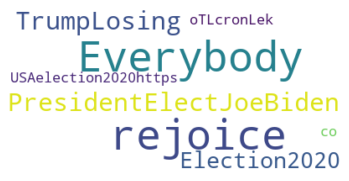

In [14]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [15]:
text = " ".join(review for review in df.text)
print ("Hay {} palabras en la combinación de todos los tuits.".format(len(text)))

Hay 11631 palabras en la combinación de todos los tuits.


In [16]:
stopwords = set(STOPWORDS)
stopwords.update(["https","RT"])

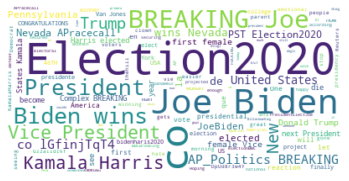

In [17]:
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [18]:
def remove_url(txt):
    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

In [19]:
import re
text= remove_url(text)
text

'JOE BIDEN 77 ans New President 46emeSenateur a 29 ans La vie ne lui a pas toujours fait cadeaux Ce gars vie Everybody rejoice PresidentElectJoeBiden TrumpLosing Election2020 RT Reuters Democrat Joe Biden wins Election2020 RT argilacarlos Good Bye Trump Election2020 RT TheChrisShaw ThatTimWalker Awaiting seeing Johnsons fake delight at the great news Election2020 RT intoactionus CONGRATULATIONS TO AMERICAS 46TH PRESIDENT JoeBiden amp VICE PRESIDENT KamalaHarris PresidentBiden VicePresidentHarris RT mduggan10 Congrats to the new administration My hope is we can unite this country and its people let the hate finally stop One clown gone Well done America for voting in an adult to become President Election2020 One more clown to go BorisOut If seeing a man of Rudy Giulianis calibre talking absolute bollocks on a podium for the world to laugh at doesnt RT ABCWorldNews Joe Biden Never forget the tallies arent just numbersthey represent votes and voters Men and women who exercise the RT thehil

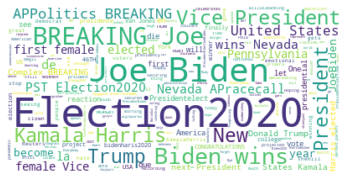

In [42]:
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [45]:
wordcloud.to_file(R"C:\Users\Toshiba\Desktop\reto SEE\Word.png")

In [21]:
import sys
!{sys.executable} -m pip install TextBlob

You should consider upgrading via the 'C:\Users\Toshiba\Anaconda3\python.exe -m pip install --upgrade pip' command.


In [24]:
from textblob import TextBlob

In [22]:
def get_tweet_sentiment(tweet):
        analysis = TextBlob(tweet)
        language = analysis.detect_language()
        if language == 'en':
            analysis_ready = analysis
        else:
            analysis_ready = analysis.translate(to='en')
            
        if analysis_ready.sentiment.polarity > 0: 
            return 'positive'
        elif analysis_ready.sentiment.polarity == 0: 
            return 'neutral'
        else: 
            return 'negative'

In [25]:
df['Sentiment']=df['text'].apply(get_tweet_sentiment)

In [26]:
df.head()

,Fecha,Screen_name,user_name,user_location,coordinates,place,retweet_count,favorite_count,text,Sentiment
0,2020-11-07 17:23:02,Niggercheikhou,Nℹ️gger Ⓜ️🗣 (Sniper)🇸🇳,Dakar,NaN,NaN,0,0,JOE BIDEN 77 ans New President 46emeSenateur a...,positive
1,2020-11-07 17:23:02,HansTenk,Hans Tenk,Nijmegen,NaN,NaN,0,0,Everybody rejoice! #PresidentElectJoeBiden #Tr...,neutral
2,2020-11-07 17:23:02,ELewald,E. Lewald,NaN,NaN,NaN,2228,0,RT @Reuters: Democrat Joe Biden wins #Election...,positive
3,2020-11-07 17:23:02,GuevaraGus11,Gustavo Guevara 🇨🇴,"Washington, DC",NaN,NaN,109,0,RT @argilacarlos: Good Bye Trump. #Election202...,positive
4,2020-11-07 17:23:02,cmocg20,dann,NaN,NaN,NaN,6,0,RT @The_ChrisShaw: @ThatTimWalker Awaiting see...,positive


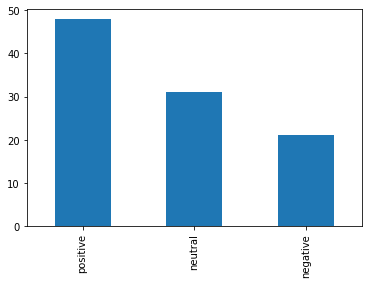

In [27]:
df["Sentiment"].value_counts().plot(kind='bar')

In [31]:
testimonial = TextBlob("Biden wins")
testimonial.sentiment

Sentiment(polarity=0.3, subjectivity=0.2)

In [32]:
testimonial = TextBlob("Biden loose")
testimonial.sentiment

Sentiment(polarity=-0.07692307692307693, subjectivity=0.2692307692307692)

In [30]:
testimonial = TextBlob("Trump loose")
testimonial.sentiment

Sentiment(polarity=-0.07692307692307693, subjectivity=0.2692307692307692)

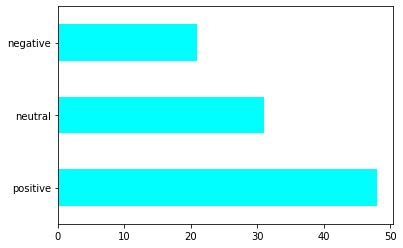

In [41]:
df["Sentiment"].value_counts().plot(kind='barh', color='cyan')